In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

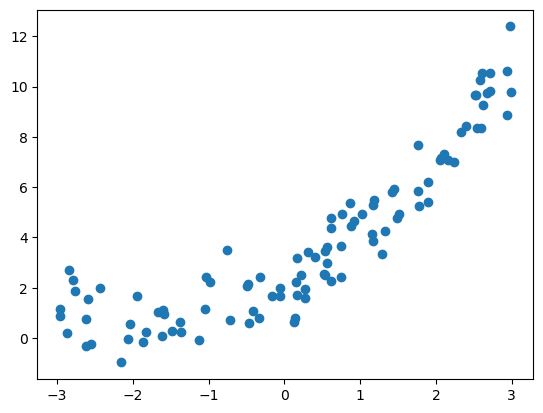

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [5]:
from sklearn.linear_model import LinearRegression


In [6]:
regression = LinearRegression()
regression.fit(x_train,y_train)
y_pred = regression.predict(x_test)

In [7]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 Score : ',r2_score(y_test,y_pred))
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score :  0.7313600737748183
MAE :  1.158439792937998
MSE :  2.6300785510145053
RMSE :  1.6217516921571271


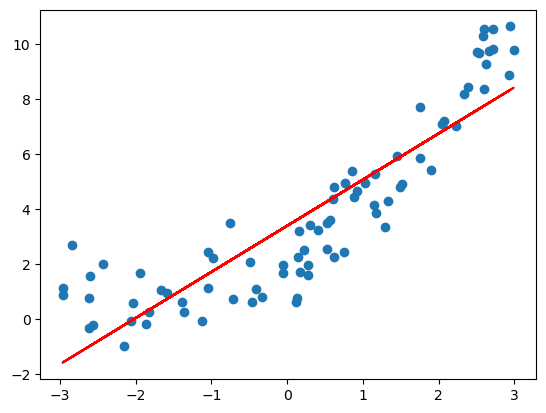

In [9]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),color='red')


In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [11]:
regression = LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred = regression.predict(x_test_poly)

In [12]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 Score : ',r2_score(y_test,y_pred))
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score :  0.9413602827003549
MAE :  0.6458499765674203
MSE :  0.5741032797115688
RMSE :  0.7576960338497021


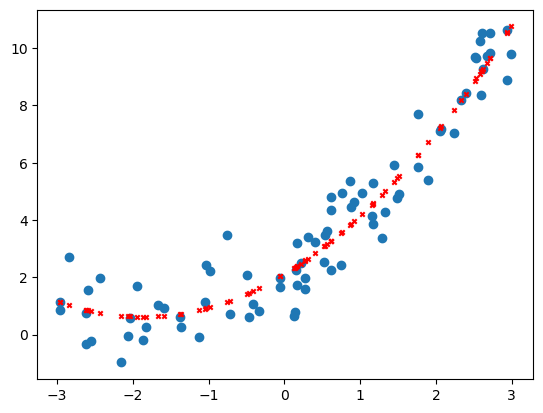

In [14]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,regression.predict(x_train_poly),color='red',marker='x',s=10)

In [15]:
from sklearn.pipeline import Pipeline

In [19]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

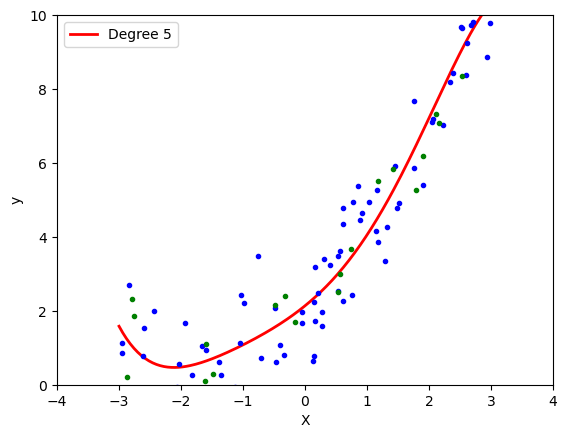

In [20]:
poly_regression(5)